In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common Imports
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [7]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

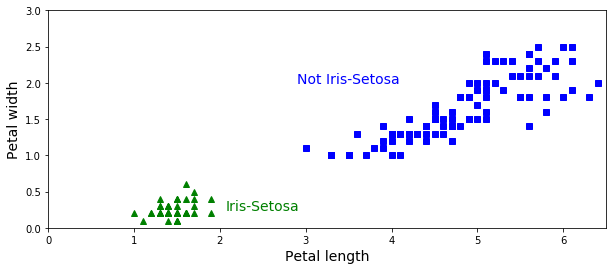

In [8]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 0).astype(np.int)
#y = (iris["target"] == 2).astype(np.int)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.plot(X[y==2, 0], X[y==2, 1], "r^")

plt.text(3.5, 2.0, "Not Iris-Setosa", fontsize=14, color="b", ha="center")
plt.text(2.5, 0.25, "Iris-Setosa", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0,6.5,0,3])
plt.show()

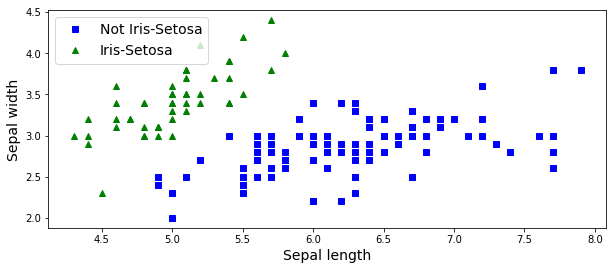

In [9]:
## Visualize Petal/Sepal

using_data = "Sepal" # "Petal" or "Sepal"
TARGET = (2,3) if using_data == "Petal" else (0,1)

X = iris["data"][:, TARGET]  # petal length, petal width
y = (iris["target"] == 0).astype(np.int)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Iris-Setosa")

plt.legend(loc="upper left", fontsize =14)

plt.xlabel("{} length".format(using_data), fontsize=14)
plt.ylabel("{} width".format(using_data), fontsize=14)

plt.show()

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

using_data = "Sepal" # "Petal" or "Sepal"

TARGET = (2,3) if using_data == "Petal" else (0,1)

X = iris.data[:, TARGET]  # petal length, petal width
y = (iris.target == 0).astype(np.int)


per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

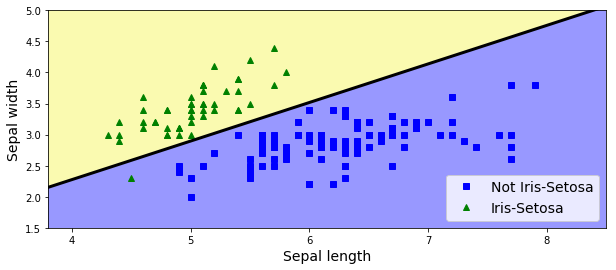

In [11]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
    
axes = [0, 6.5, 0, 3] if (using_data == "Petal") else [3.8, 8.5, 1.5, 5.0]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("{} length".format(using_data), fontsize=14)
plt.ylabel("{} width".format(using_data), fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()